# EDA on adults dataset

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?')
df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','census_income']
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,census_income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
census_income        0
dtype: int64

In [7]:
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [13]:
df_edu = df[['education','education_num']].groupby('education').mean().sort_values('education_num')

In [17]:
df_edu

,education_num
education,
Preschool,1
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
10th,6
11th,7
12th,8
HS-grad,9


In [14]:
edu_num = list(df_edu.education_num)

In [15]:
edu_num

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [16]:
workclass = list(df.workclass.unique())
workclass

[' Self-emp-not-inc',
 ' Private',
 ' State-gov',
 ' Federal-gov',
 ' Local-gov',
 nan,
 ' Self-emp-inc',
 ' Without-pay',
 ' Never-worked']

In [19]:
sex = list(df.sex.unique())

In [20]:
sex

[' Male', ' Female']

In [21]:
male_workclass = []
female_workclass = []

for i in workclass:
    male_workclass.append(df[(df.workclass == i) & (df.sex == ' Male')].shape[0])
    female_workclass.append(df[(df.workclass == i) & (df.sex == ' Female')].shape[0])

len(male_workclass) == len(female_workclass)

True

Text(0, 0.5, ' Self-emp-not-inc')

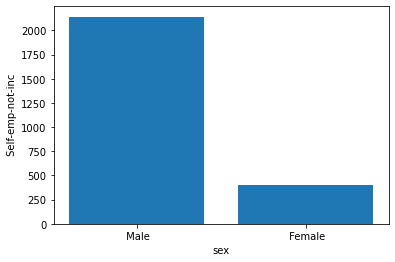

In [25]:
plt.bar(sex, [male_workclass[0], female_workclass[0]])
plt.xlabel('sex')
plt.ylabel(workclass[0])

In [33]:
df.workclass.replace(np.nan, 'Unknown', inplace=True)

In [34]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Unknown               1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

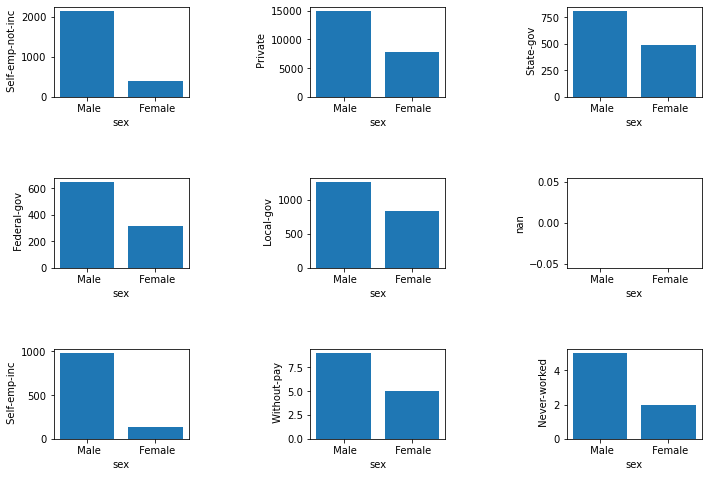

In [38]:
counter = 0
fig, ax = plt.subplots(3,3)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i,j].bar(sex, [male_workclass[counter], female_workclass[counter]])
        ax[i,j].set(xlabel='sex', ylabel=workclass[counter])
        counter += 1
        
plt.subplots_adjust(left=0.5,
                    bottom=0.5, 
                    right=2, 
                    top=2, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

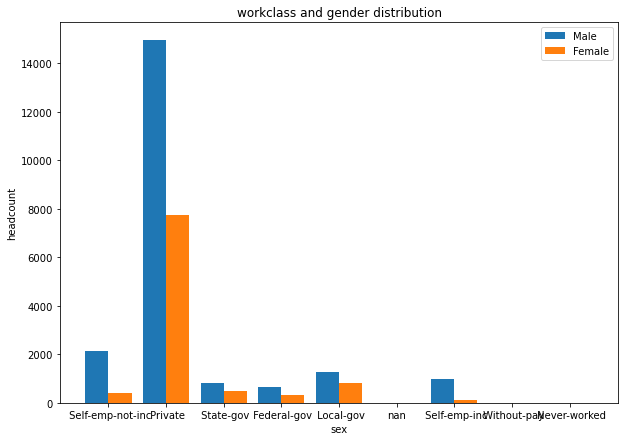

In [41]:
# we can show this complete nine bar charts into one single bar chart as below 

X = workclass
y = male_workclass
z = female_workclass

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, y, 0.4, label='Male')
plt.bar(X_axis + 0.2, z, 0.4, label='Female')

plt.rcParams['figure.figsize'] = [20, 15]
plt.xticks(X_axis, X)
plt.xlabel('sex')
plt.ylabel('headcount')
plt.title('workclass and gender distribution')
plt.legend()
plt.show()

# Here we can see that highest number of population works in private sector but still the male to female ratio is higher in local-gov and state-gov whereas it is teh lowest in self-emp individuals where male population dominates with a huge margin

In [42]:
df.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [55]:
df.occupation.replace(np.nan, 'Unknown', inplace=True)
occupation = list(df.occupation.unique())
occupation

[' Exec-managerial',
 ' Handlers-cleaners',
 ' Prof-specialty',
 ' Other-service',
 ' Adm-clerical',
 ' Sales',
 ' Craft-repair',
 ' Transport-moving',
 ' Farming-fishing',
 ' Machine-op-inspct',
 ' Tech-support',
 'Unknown',
 ' Protective-serv',
 ' Armed-Forces',
 ' Priv-house-serv']

In [45]:
male_occupation = []
female_occupation = []

for i in occupation:
    male_occupation.append(df[(df.occupation == i) & (df.sex == ' Male')].shape[0])
    female_occupation.append(df[(df.occupation == i) & (df.sex == ' Female')].shape[0])
    
len(male_occupation) == len(female_occupation)

True

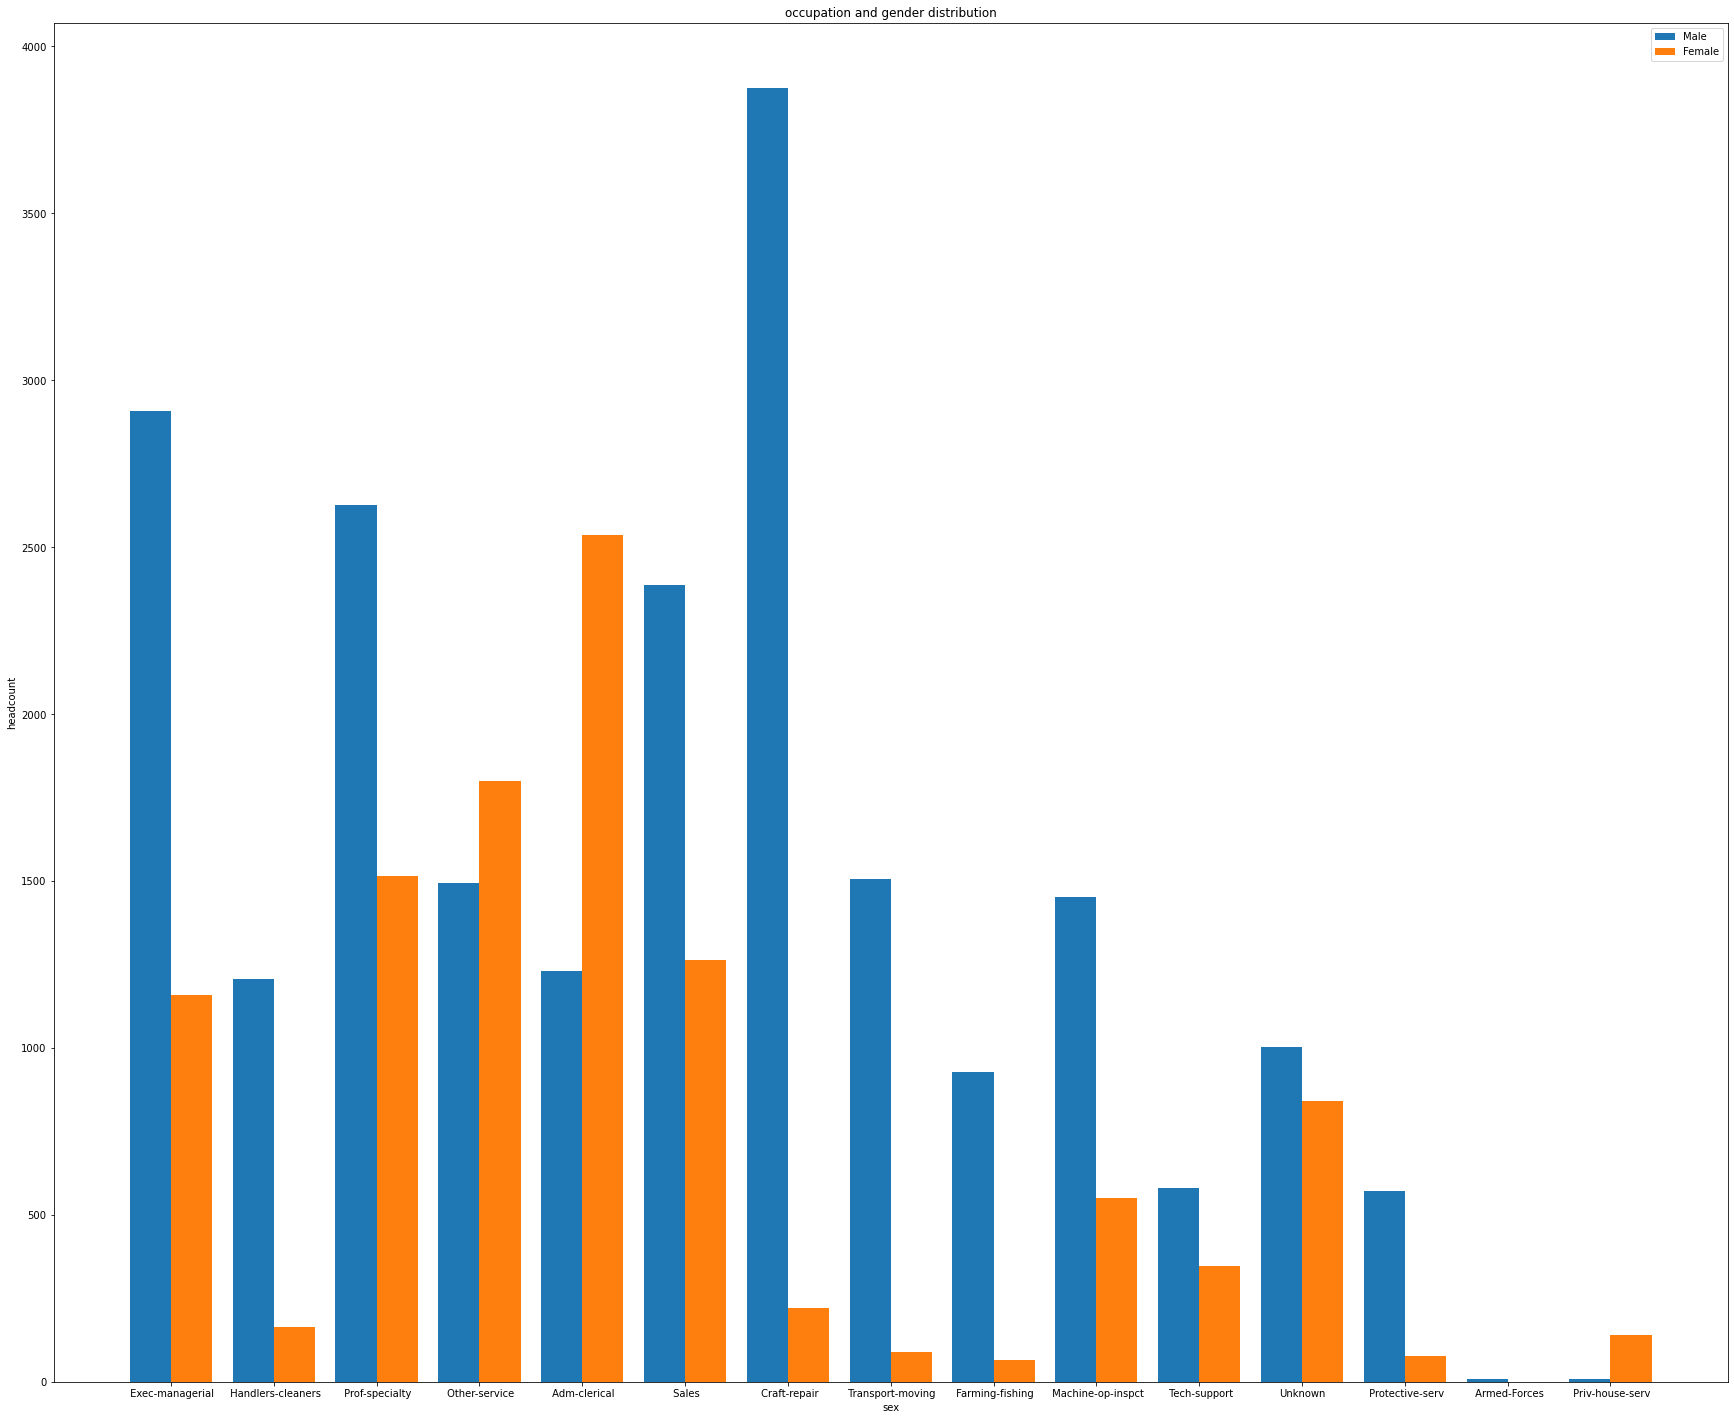

In [49]:
X = occupation
y = male_occupation
z = female_occupation

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, y, 0.4, label='Male')
plt.bar(X_axis + 0.2, z, 0.4, label='Female')

plt.rcParams['figure.figsize'] = [30, 25]
plt.xticks(X_axis, X)
plt.xlabel('sex')
plt.ylabel('headcount')
plt.title('occupation and gender distribution')
plt.legend()
plt.show()

# lets figure out the income distribution among various nationalities

In [56]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [51]:
census_income = list(df.census_income.unique())
lte_50K = []
gt_50K = []

for i in df.race.unique():
    lte_50K.append(df[(df.race == i) & (df.census_income == ' <=50K')].shape[0])
    gt_50K.append(df[(df.race == i) & (df.census_income == ' >50K')].shape[0])
    
len(lte_50K) == len(gt_50K)

True

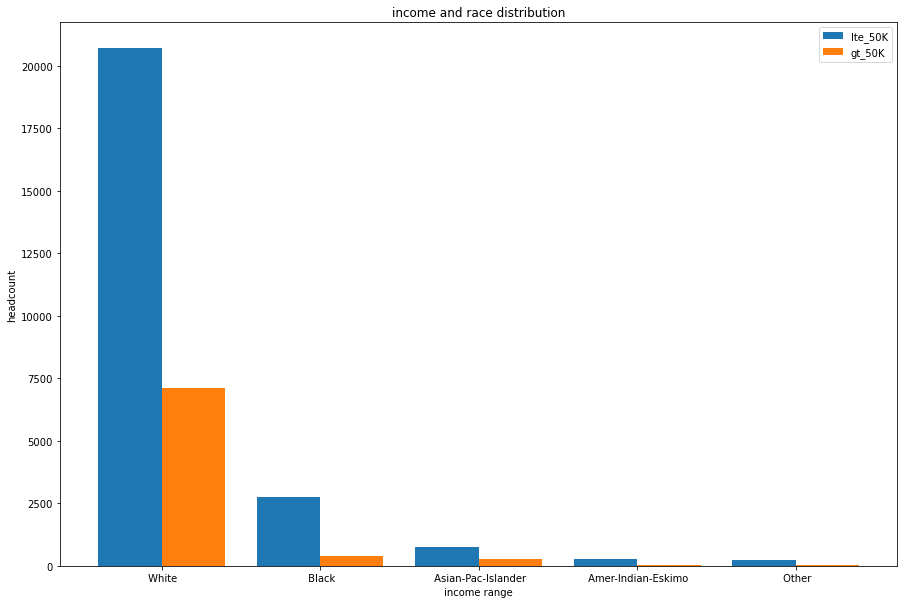

In [54]:
X = list(df.race.unique())
y = lte_50K
z = gt_50K

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, y, 0.4, label='lte_50K')
plt.bar(X_axis + 0.2, z, 0.4, label='gt_50K')

plt.rcParams['figure.figsize'] = [15, 10]
plt.xticks(X_axis, X)
plt.xlabel('income range')
plt.ylabel('headcount')
plt.title('income and race distribution')
plt.legend()
plt.show()

# lets check divorce rates in highly educated vs lower education

lets divide our data into two groups the ones with divorced and the ones still married. separated would be taken as divorced

In [57]:
df.marital_status.unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

Now we can remove those who are never married and widowed as these do not qualify to be any kind of divorce

In [59]:
df_new = df[(df.marital_status != ' Never-married') & (df.marital_status != ' Widowed')]
df_new.shape

(20885, 15)

Now lets take everyone below Bachelors to be considered as have low education and those with Bachelors and above as educated

In [60]:
high_edu = []
low_edu = []

for i in df_new.marital_status.unique():
    high_edu.append(df[(df.marital_status == i) & (df.education_num > 12)].shape[0])
    low_edu.append(df[(df.marital_status == i) & (df.education_num < 13)].shape[0])
    
len(high_edu) == len(low_edu)

True

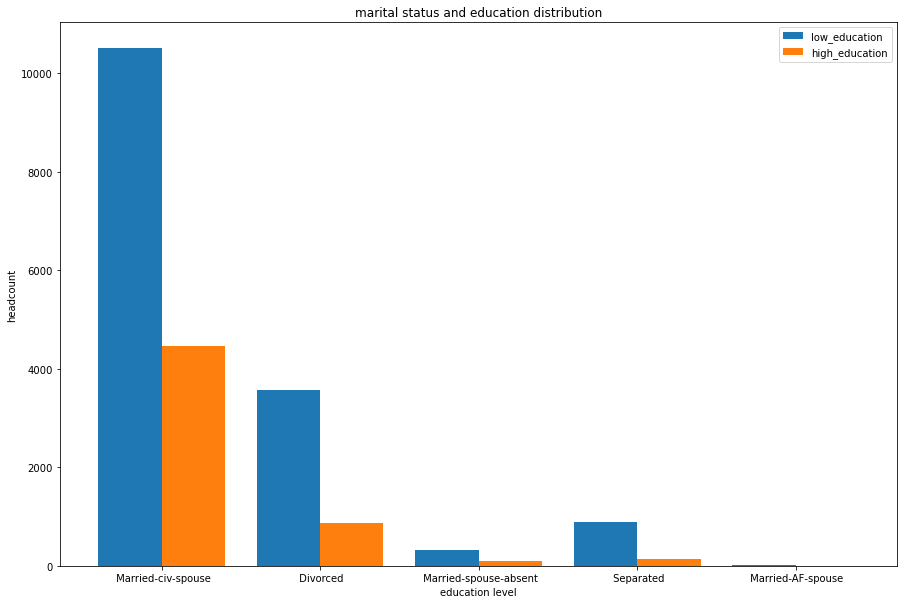

In [65]:
X = list(df_new.marital_status.unique())
y = low_edu
z = high_edu

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, y, 0.4, label='low_education')
plt.bar(X_axis + 0.2, z, 0.4, label='high_education')

plt.rcParams['figure.figsize'] = [15, 10]
plt.xticks(X_axis, X)
plt.xlabel('education level')
plt.ylabel('headcount')
plt.title('marital status and education distribution')
plt.legend()
plt.show()

This graph is somewhat ok but we need to know just divorced/separted and married so we can futher ourselves as below

In [74]:
div_sep = []
married = []

for i in df_edu.index:
    div_sep.append(df_new[(df_new.education == i) & ((df_new.marital_status == ' Divorced') | (df_new.marital_status == ' Separated'))].shape[0])
    married.append(df_new[(df_new.education == i) & ((df_new.marital_status != ' Divorced') & (df_new.marital_status != ' Separated'))].shape[0])
    
len(div_sep) == len(married)

True

Index([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th',
       ' 11th', ' 12th', ' HS-grad', ' Some-college', ' Assoc-voc',
       ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school', ' Doctorate'],
      dtype='object', name='education')

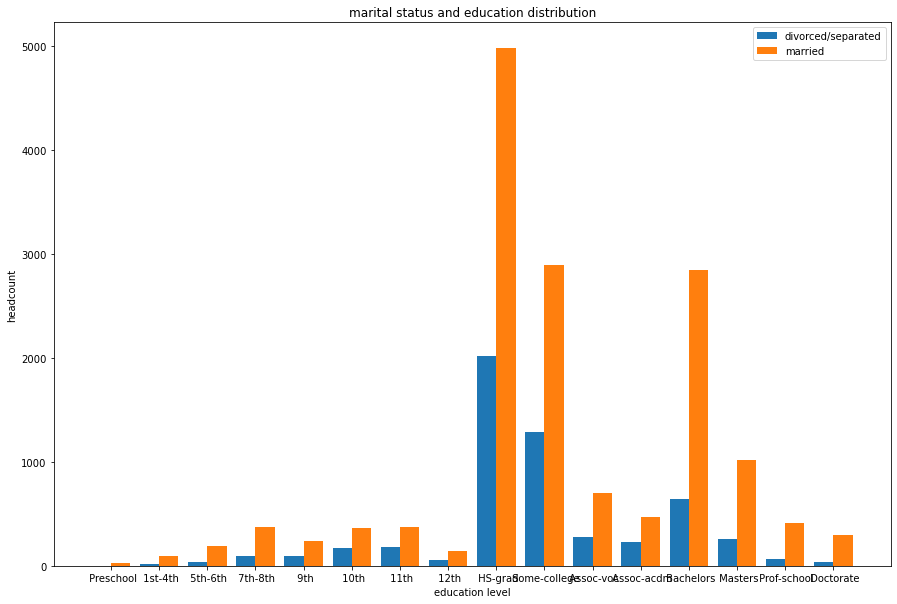

In [75]:
X = list(df_edu.index)
y = div_sep
z = married

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, y, 0.4, label='divorced/separated')
plt.bar(X_axis + 0.2, z, 0.4, label='married')

plt.rcParams['figure.figsize'] = [15, 10]
plt.xticks(X_axis, X)
plt.xlabel('education level')
plt.ylabel('headcount')
plt.title('marital status and education distribution')
plt.legend()
plt.show()

## To be continued with a lot more questions on this dataset as there are a lot of insights that can be retrieved from this dataset itself such as
1. racial distribution vs occupation
2. workclass vs native_country
3. capital_gain vs sex
4. capital_loss vs sex
5. and the one column we totally neglected age distribution vs a lot of features 
and so on .....